In [1]:
!nvidia-smi

Sun Apr  4 08:30:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install hdf5storage

     |████████████████████████████████| 61kB 3.3MB/s 


In [ ]:
%cd ..

/content


In [ ]:
import pandas as pd
import numpy as np
import scipy.io as sio
import h5py
import hdf5storage

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Digital_Music_5.json.gz

--2021-03-24 11:56:39--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Digital_Music_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19408584 (19M) [application/octet-stream]
Saving to: ‘Digital_Music_5.json.gz’

Digital_Music_5.jso 100%[===================>]  18.51M  10.5MB/s    in 1.8s    

2021-03-24 11:56:41 (10.5 MB/s) - ‘Digital_Music_5.json.gz’ saved [19408584/19408584]



In [ ]:
import json
import pandas as pd
import gzip


def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('/content/Digital_Music_5.json.gz')

In [ ]:
new_df = df.drop(labels = ['style', 'verified', 'reviewTime', 'reviewerName',
                  'reviewText', 'summary', 'vote', 'image'], axis=1)
new_df = new_df.rename(columns = {'overall': 'rating', 'reviewerID' : 'user', 'asin': 'item', 'unixReviewTime' : 'timestamp'})

data = new_df

data = data.drop(['timestamp'], axis = 1).groupby(['item', 'user']).aggregate(np.mean).reset_index()

data['rating'] = [int(np.round(x)) for x in data['rating']]

for category in ['item', 'user']:
  lst = list(set(data[category]))
  lst.sort()
  lst = [tup[::-1] for tup in list(enumerate(lst))]
  curr_dict = dict(lst)
  data[category] = [curr_dict[id] for id in data[category].values]

In [ ]:
matrix_df = data.pivot_table(index = 'user', columns = 'item', values = 'rating').fillna(0).astype(int)

In [ ]:
np.random.seed(1)

threshold = 20 # testing split percentage (example)
# train_test_split
matrix = matrix_df.values
Otraining_matrix = matrix.copy()
Otest_matrix = matrix.copy()

for i in range(matrix.shape[0]):
  for j in range(matrix.shape[1]):
    if matrix[i][j] > 0:
      random_int = np.random.randint(0, 100)

      if random_int < threshold:
        Otest_matrix[i][j] = 1
        Otraining_matrix[i][j] = 0

      else:
        Otraining_matrix[i][j] = 1
        Otest_matrix[i][j] = 0

In [ ]:
%cd ../..

/content/IGMC


In [ ]:

matfiledata = {} # make a dictionary to store the MAT data in
matfiledata[u'variable1'] = np.zeros(100) # *** u prefix for variable name = unicode format, no issues thru Python 3.5; advise keeping u prefix indicator format based on feedback despite docs ***
matfiledata[u'variable2'] = np.ones(300)

mdic = {u"M": matrix, u"Otraining": Otraining_matrix, u"Otest": Otest_matrix}
# sio.savemat('/content/amazon_vg.mat', mdic)
hdf5storage.write(mdic, '.', 'train_test_dataset.mat', matlab_compatible=True)

In [2]:
# git clone

!git clone -b transfer_learning --single-branch https://github.com/CS6101-Team/IGMC.git

import os
# os.getcwd()

# Change Directory

%cd /content/IGMC

# install packages
# torch 1.4.0

!pip install torch==1.4.0 torchvision==0.5.0

# torch-geometric 1.4.2

!pip install --no-index torch-scatter -f https://pytorch-geometric.com/whl/torch-1.4.0+cu101.html
!pip install --no-index torch-sparse -f https://pytorch-geometric.com/whl/torch-1.4.0+cu101.html
!pip install --no-index torch-cluster -f https://pytorch-geometric.com/whl/torch-1.4.0+cu101.html
!pip install --no-index torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.4.0+cu101.html
!pip install torch-geometric==1.4.2

Cloning into 'IGMC'...
remote: Enumerating objects: 344, done.
remote: Counting objects: 100% (344/344), done.
remote: Compressing objects: 100% (289/289), done.
remote: Total 596 (delta 88), reused 286 (delta 44), pack-reused 252
Receiving objects: 100% (596/596), 89.28 MiB | 20.36 MiB/s, done.
Resolving deltas: 100% (223/223), done.
/content/IGMC
     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 69.5MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.4.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
Looking in links: https://pytorch-geometric.com/whl/torch-1.4.0+cu101.html
     |████████████████████████████████| 10.6MB 12.1MB/s 
Looking in link

# Training with Flixster

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


4 digit code:  
1st digit: 1-hop or 2-hop (1 or 2)   
2nd digit: Aggregation layer  
c - concatentation  
m - max pooling  
l - lstm-attention  
3rd digit: Use of graph norm (0 or 1).  
4th digit: Use of graph sage (0 or 1)

In [ ]:
from IPython.display import Javascript

In [ ]:
!du -sk raw_data/amazon_fashion

28	raw_data/amazon_fashion


In [ ]:
!cp /content/drive/Shareddrives/Unlimited\ Google\ Drive\ 3/Files/amazon_fashion.mat /content/IGMC/raw_data/amazon_fashion

cp: error reading '/content/drive/Shareddrives/Unlimited Google Drive 3/Files/amazon_fashion.mat': Input/output error


In [ ]:
!git clone -b master --single-branch https://github.com/CS6101-Team/IGMC.git

%cd /content/IGMC

Cloning into 'IGMC'...
remote: Enumerating objects: 317, done.
remote: Counting objects: 100% (317/317), done.
remote: Compressing objects: 100% (271/271), done.
remote: Total 569 (delta 76), reused 264 (delta 35), pack-reused 252
Receiving objects: 100% (569/569), 75.13 MiB | 25.63 MiB/s, done.
Resolving deltas: 100% (211/211), done.
/content/IGMC


## t2c00 (Base IGMC) Amazon

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

!python Main.py --data-name ml_100k --epochs 40 --fname t3c00 --testing --dynamic-train --ensemble --model-type IGMC

<IPython.core.display.Javascript object>

Namespace(ARR=0.001, adj_dropout=0.2, batch_size=50, continue_from=None, data_appendix='', data_name='ml_100k', data_seed=1234, debug=False, dynamic_test=False, dynamic_train=True, dynamic_val=False, ensemble=True, epochs=40, fname='t3c00', force_undirected=False, gconv_type='GCNConv', hop=1, keep_old=False, lr=0.001, lr_decay_factor=0.1, lr_decay_step_size=50, max_nodes_per_hop=10000, max_test_num=None, max_train_num=None, max_val_num=None, model_type='IGMC', multiply_by=1, no_train=False, num_relations=5, ratio=1.0, reprocess=False, sample_ratio=1.0, save_appendix='', save_interval=10, seed=1, standard_rating=False, test_freq=1, testing=True, transfer='', use_features=False, use_graphnorm=False, visualize=False)
Command line input: python Main.py --data-name ml_100k --epochs 40 --fname t3c00 --testing --dynamic-train --ensemble --model-type IGMC
 is saved.
Using official MovieLens split u1.base/u1.test with 20% validation...
User features shape: (943, 23)
Item features shape: (1682, 

In [ ]:
!mv /content/IGMC/results/ml_100k_testmode /content/IGMC/results/t3c00

## t2c10 (IGMC with graph norm)

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

!python Main.py --data-name amazon_fashion --epochs 40 --testing --ensemble --hop 1 --model-type IGMC --use-graphnorm --fname t2c10

<IPython.core.display.Javascript object>

Namespace(ARR=0.001, adj_dropout=0.2, batch_size=50, continue_from=None, data_appendix='', data_name='amazon_fashion', data_seed=1234, debug=False, dynamic_test=False, dynamic_train=False, dynamic_val=False, ensemble=True, epochs=40, fname='t2c10', force_undirected=False, gconv_type='GCNConv', hop='1', keep_old=False, lr=0.001, lr_decay_factor=0.1, lr_decay_step_size=50, max_nodes_per_hop=10000, max_test_num=None, max_train_num=None, max_val_num=None, model_type='IGMC', multiply_by=1, no_train=False, num_relations=5, ratio=1.0, reprocess=False, sample_ratio=1.0, save_appendix='', save_interval=10, seed=1, standard_rating=False, test_freq=1, testing=True, transfer='', use_features=False, use_graphnorm=True, visualize=False)
Command line input: python Main.py --data-name amazon_fashion --epochs 40 --testing --ensemble --hop 1 --model-type IGMC --use-graphnorm --fname t2c10
 is saved.
raw_data/amazon_fashion/training_test_dataset.mat
tcmalloc: large alloc 1563435008 bytes == 0x5630ae69800

In [ ]:
!python Main.py --data-name ml_100k --epochs 40 --testing --ensemble --hop 1 --model-type IGMC --use-graphnorm --fname t3c10

In [ ]:
!zip -r amazon_music_testmode.zip ./results/amazon_music_testmode/
!zip -r ml_100k_testmode.zip ./results/ml_100k_testmode/

updating: results/amazon_music_testmode/ (stored 0%)
updating: results/amazon_music_testmode/t3c10-tabular_results.csv (deflated 63%)
updating: results/amazon_music_testmode/t3m10-tabular_results.csv (deflated 63%)
updating: results/amazon_music_testmode/cmd_input.txt (deflated 67%)
updating: results/amazon_music_testmode/t3c10-log.csv (deflated 5%)
updating: results/amazon_music_testmode/t3m10-log.csv (deflated 6%)
updating: results/amazon_music_testmode/t3c00-tabular_results.csv (deflated 63%)
updating: results/amazon_music_testmode/t3c00-log.csv (deflated 5%)
  adding: results/ml_100k_testmode/ (stored 0%)
  adding: results/ml_100k_testmode/t2c00-tabular_results.csv (deflated 64%)
  adding: results/ml_100k_testmode/t2c00-log.csv (deflated 5%)
  adding: results/ml_100k_testmode/cmd_input.txt (deflated 79%)


## 1m00 (IGMC with Max Pooling)

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

!python Main.py --data-name flixster --epochs 40 --testing --ensemble --model-type MaxPoolIGMC --fname 1m00 --hop 2

<IPython.core.display.Javascript object>

Namespace(ARR=0.001, adj_dropout=0.2, batch_size=50, continue_from=None, data_appendix='', data_name='flixster', data_seed=1234, debug=False, dynamic_test=False, dynamic_train=False, dynamic_val=False, ensemble=True, epochs=40, fname='1m00', force_undirected=False, gconv_type='GCNConv', hop='2', keep_old=False, lr=0.001, lr_decay_factor=0.1, lr_decay_step_size=50, max_nodes_per_hop=10000, max_test_num=None, max_train_num=None, max_val_num=None, model_type='MaxPoolIGMC', multiply_by=1, no_train=False, num_relations=5, ratio=1.0, reprocess=False, sample_ratio=1.0, save_appendix='', save_interval=10, seed=1, standard_rating=False, test_freq=1, testing=True, transfer='', use_features=False, use_graphnorm=False, visualize=False)
Command line input: python Main.py --data-name flixster --epochs 40 --testing --ensemble --model-type MaxPoolIGMC --fname 1m00 --hop 2
 is saved.
raw_data/flixster/training_test_dataset.mat
raw_data/flixster/training_test_dataset.mat
raw_data/flixster/training_test_

## t2m10 (IGMC with Max Pooling with graph norm)

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

!python Main.py --data-name amazon_fashion --epochs 40 --testing --ensemble --model-type MaxPoolIGMC --use-graphnorm --fname t2m10


<IPython.core.display.Javascript object>

Namespace(ARR=0.001, adj_dropout=0.2, batch_size=50, continue_from=None, data_appendix='', data_name='amazon_fashion', data_seed=1234, debug=False, dynamic_test=False, dynamic_train=False, dynamic_val=False, ensemble=True, epochs=40, fname='t2m10', force_undirected=False, gconv_type='GCNConv', hop=1, keep_old=False, lr=0.001, lr_decay_factor=0.1, lr_decay_step_size=50, max_nodes_per_hop=10000, max_test_num=None, max_train_num=None, max_val_num=None, model_type='MaxPoolIGMC', multiply_by=1, no_train=False, num_relations=5, ratio=1.0, reprocess=False, sample_ratio=1.0, save_appendix='', save_interval=10, seed=1, standard_rating=False, test_freq=1, testing=True, transfer='', use_features=False, use_graphnorm=True, visualize=False)
Command line input: python Main.py --data-name amazon_fashion --epochs 40 --testing --ensemble --model-type MaxPoolIGMC --use-graphnorm --fname t2m10
 is saved.
raw_data/amazon_fashion/training_test_dataset.mat
tcmalloc: large alloc 1563435008 bytes == 0x55e7ec4

In [ ]:
# t3m10
!python Main.py --data-name ml_100k --epochs 40 --testing --ensemble --model-type MaxPoolIGMC --dynamic-train --use-graphnorm --fname t3m10 


Namespace(ARR=0.001, adj_dropout=0.2, batch_size=50, continue_from=None, data_appendix='', data_name='ml_100k', data_seed=1234, debug=False, dynamic_test=False, dynamic_train=True, dynamic_val=False, ensemble=True, epochs=40, fname='t3m10', force_undirected=False, gconv_type='GCNConv', hop=1, keep_old=False, lr=0.001, lr_decay_factor=0.1, lr_decay_step_size=50, max_nodes_per_hop=10000, max_test_num=None, max_train_num=None, max_val_num=None, model_type='MaxPoolIGMC', multiply_by=1, no_train=False, num_relations=5, ratio=1.0, reprocess=False, sample_ratio=1.0, save_appendix='', save_interval=10, seed=1, standard_rating=False, test_freq=1, testing=True, transfer='', use_features=False, use_graphnorm=True, visualize=False)
Command line input: python Main.py --data-name ml_100k --epochs 40 --testing --ensemble --model-type MaxPoolIGMC --dynamic-train --use-graphnorm --fname t3m10
 is saved.
Using official MovieLens split u1.base/u1.test with 20% validation...
User features shape: (943, 23)

In [ ]:
!mv /content/IGMC/results/ml_100k_testmode /content/IGMC/results/t3m10 

## 1l00 (IGMC with LSTM Attention)

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

!python Main.py --data-name flixster --epochs 40 --testing --ensemble --model-type LSTMAttentionIGMC --fname 1l00

<IPython.core.display.Javascript object>

Namespace(ARR=0.001, adj_dropout=0.2, batch_size=50, continue_from=None, data_appendix='', data_name='flixster', data_seed=1234, debug=False, dynamic_test=False, dynamic_train=False, dynamic_val=False, ensemble=True, epochs=40, fname='1l00', force_undirected=False, gconv_type='GCNConv', hop=1, keep_old=False, lr=0.001, lr_decay_factor=0.1, lr_decay_step_size=50, max_nodes_per_hop=10000, max_test_num=None, max_train_num=None, max_val_num=None, model_type='LSTMAttentionIGMC', multiply_by=1, no_train=False, num_relations=5, ratio=1.0, reprocess=False, sample_ratio=1.0, save_appendix='', save_interval=10, seed=1, standard_rating=False, test_freq=1, testing=True, transfer='', use_features=False, use_graphnorm=False, visualize=False)
Command line input: python Main.py --data-name flixster --epochs 40 --testing --ensemble --model-type LSTMAttentionIGMC --fname 1l00
 is saved.
raw_data/flixster/training_test_dataset.mat
raw_data/flixster/training_test_dataset.mat
raw_data/flixster/training_tes

## 1l10 (IGMC with LSTM Attention with GraphNorm)

In [ ]:
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

!python Main.py --data-name flixster --epochs 40 --testing --ensemble --model-type LSTMAttentionIGMC --use-graphnorm --fname 1l10

<IPython.core.display.Javascript object>

Namespace(ARR=0.001, adj_dropout=0.2, batch_size=50, continue_from=None, data_appendix='', data_name='flixster', data_seed=1234, debug=False, dynamic_test=False, dynamic_train=False, dynamic_val=False, ensemble=True, epochs=40, fname='1l10', force_undirected=False, gconv_type='GCNConv', hop=1, keep_old=False, lr=0.001, lr_decay_factor=0.1, lr_decay_step_size=50, max_nodes_per_hop=10000, max_test_num=None, max_train_num=None, max_val_num=None, model_type='LSTMAttentionIGMC', multiply_by=1, no_train=False, num_relations=5, ratio=1.0, reprocess=False, sample_ratio=1.0, save_appendix='', save_interval=10, seed=1, standard_rating=False, test_freq=1, testing=True, transfer='', use_features=False, use_graphnorm=True, visualize=False)
Command line input: python Main.py --data-name flixster --epochs 40 --testing --ensemble --model-type LSTMAttentionIGMC --use-graphnorm --fname 1l10
 is saved.
raw_data/flixster/training_test_dataset.mat
raw_data/flixster/training_test_dataset.mat
raw_data/flixst

## Transfer Learning

In [23]:
!python Main.py --data-name amazon_music --epochs 40 --testing --no-train --ensemble --transfer results/t3c00 --dynamic-train --num-relations 5 --multiply-by 1 --fname t3c00

Namespace(ARR=0.001, adj_dropout=0.2, batch_size=50, continue_from=None, data_appendix='', data_name='amazon_music', data_seed=1234, debug=False, dynamic_test=False, dynamic_train=True, dynamic_val=False, ensemble=True, epochs=40, fname='t3c00', force_undirected=False, gconv_type='GCNConv', hop=1, keep_old=False, lr=0.001, lr_decay_factor=0.1, lr_decay_step_size=50, max_nodes_per_hop=10000, max_test_num=None, max_train_num=None, max_val_num=None, model_type='IGMC', multiply_by=1, no_train=True, num_relations=5, ratio=1.0, reprocess=False, sample_ratio=1.0, save_appendix='', save_interval=10, seed=1, standard_rating=False, test_freq=1, testing=True, transfer='results/t3c00', use_features=False, use_graphnorm=False, visualize=False)
Command line input: python Main.py --data-name amazon_music --epochs 40 --testing --no-train --ensemble --transfer results/t3c00 --dynamic-train --num-relations 5 --multiply-by 1 --fname t3c00
 is saved.
raw_data/amazon_music/training_test_dataset.mat
tcmallo

In [24]:
!python Main.py --data-name amazon_music --epochs 40 --testing --no-train --ensemble --transfer results/t3c10/ --use-graphnorm --dynamic-train --num-relations 5 --multiply-by 1 --fname t3c10

Namespace(ARR=0.001, adj_dropout=0.2, batch_size=50, continue_from=None, data_appendix='', data_name='amazon_music', data_seed=1234, debug=False, dynamic_test=False, dynamic_train=True, dynamic_val=False, ensemble=True, epochs=40, fname='t3c10', force_undirected=False, gconv_type='GCNConv', hop=1, keep_old=False, lr=0.001, lr_decay_factor=0.1, lr_decay_step_size=50, max_nodes_per_hop=10000, max_test_num=None, max_train_num=None, max_val_num=None, model_type='IGMC', multiply_by=1, no_train=True, num_relations=5, ratio=1.0, reprocess=False, sample_ratio=1.0, save_appendix='', save_interval=10, seed=1, standard_rating=False, test_freq=1, testing=True, transfer='results/t3c10/', use_features=False, use_graphnorm=True, visualize=False)
Command line input: python Main.py --data-name amazon_music --epochs 40 --testing --no-train --ensemble --transfer results/t3c10/ --use-graphnorm --dynamic-train --num-relations 5 --multiply-by 1 --fname t3c10
 is saved.
raw_data/amazon_music/training_test_da

In [25]:
!python Main.py --data-name amazon_music --epochs 40 --testing --no-train --ensemble --transfer results/t3m10/ --dynamic-train --model-type MaxPoolIGMC --use-graphnorm  --num-relations 5 --multiply-by 1 --fname t3m10

Namespace(ARR=0.001, adj_dropout=0.2, batch_size=50, continue_from=None, data_appendix='', data_name='amazon_music', data_seed=1234, debug=False, dynamic_test=False, dynamic_train=True, dynamic_val=False, ensemble=True, epochs=40, fname='t3m10', force_undirected=False, gconv_type='GCNConv', hop=1, keep_old=False, lr=0.001, lr_decay_factor=0.1, lr_decay_step_size=50, max_nodes_per_hop=10000, max_test_num=None, max_train_num=None, max_val_num=None, model_type='MaxPoolIGMC', multiply_by=1, no_train=True, num_relations=5, ratio=1.0, reprocess=False, sample_ratio=1.0, save_appendix='', save_interval=10, seed=1, standard_rating=False, test_freq=1, testing=True, transfer='results/t3m10/', use_features=False, use_graphnorm=True, visualize=False)
Command line input: python Main.py --data-name amazon_music --epochs 40 --testing --no-train --ensemble --transfer results/t3m10/ --dynamic-train --model-type MaxPoolIGMC --use-graphnorm --num-relations 5 --multiply-by 1 --fname t3m10
 is saved.
raw_da

In [ ]:
!unzip /content/IGMC/transfer_learn_results/t2c00.zip 
!unzip /content/IGMC/transfer_learn_results/t2c10.zip 
!unzip /content/IGMC/transfer_learn_results/t2m10.zip
!unzip /content/IGMC/transfer_learn_results/t3c00.zip 
!unzip /content/IGMC/transfer_learn_results/t3c10.zip 
!unzip /content/IGMC/transfer_learn_results/t3m10.zip

In [27]:
!zip -r ml_100k-flixster-transf.zip ./results/ml_100k-flixster-transf/
!zip -r ml_100k-amazon_music-transf.zip ./results/ml_100k-amazon_music-transf/

  adding: results/ml_100k-flixster-transf/ (stored 0%)
  adding: results/ml_100k-flixster-transf/t3c00-log.csv (deflated 5%)
  adding: results/ml_100k-flixster-transf/cmd_input.txt (deflated 68%)
  adding: results/ml_100k-flixster-transf/t3c10-tabular_results.csv (deflated 59%)
  adding: results/ml_100k-flixster-transf/t3c00-tabular_results.csv (deflated 59%)
  adding: results/ml_100k-flixster-transf/t3m10-tabular_results.csv (deflated 59%)
  adding: results/ml_100k-flixster-transf/t3c10-log.csv (deflated 6%)
  adding: results/ml_100k-flixster-transf/t3m10-log.csv (deflated 6%)
  adding: results/ml_100k-amazon_music-transf/ (stored 0%)
  adding: results/ml_100k-amazon_music-transf/t3c00-log.csv (deflated 5%)
  adding: results/ml_100k-amazon_music-transf/cmd_input.txt (deflated 67%)
  adding: results/ml_100k-amazon_music-transf/t3c10-tabular_results.csv (deflated 63%)
  adding: results/ml_100k-amazon_music-transf/t3c00-tabular_results.csv (deflated 63%)
  adding: results/ml_100k-amazon_

In [26]:
!unzip /content/IGMC/flixster-amazon_music-transf.zip
!unzip /content/IGMC/flixster-ml_100k-transf.zip

Archive:  /content/IGMC/flixster-amazon_music-transf.zip
   creating: results/flixster-amazon_music-transf/
  inflating: results/flixster-amazon_music-transf/cmd_input.txt  
  inflating: results/flixster-amazon_music-transf/1c10-log.csv  
  inflating: results/flixster-amazon_music-transf/1m10-log.csv  
  inflating: results/flixster-amazon_music-transf/1c00-log.csv  
  inflating: results/flixster-amazon_music-transf/1c00-tabular_results.csv  
  inflating: results/flixster-amazon_music-transf/1m10-tabular_results.csv  
  inflating: results/flixster-amazon_music-transf/1c10-tabular_results.csv  
Archive:  /content/IGMC/flixster-ml_100k-transf.zip
   creating: results/flixster-ml_100k-transf/
  inflating: results/flixster-ml_100k-transf/cmd_input.txt  
  inflating: results/flixster-ml_100k-transf/1c10-log.csv  
  inflating: results/flixster-ml_100k-transf/1m10-log.csv  
  inflating: results/flixster-ml_100k-transf/1c00-log.csv  
  inflating: results/flixster-ml_100k-transf/1c00-tabular_res

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
results_df = pd.read_csv("/content/IGMC/results/flixster-ml_100k-transf/1c00-tabular_results.csv")
results_df2 = pd.read_csv("/content/IGMC/results/flixster-ml_100k-transf/1c10-tabular_results.csv")
results_df3 = pd.read_csv("/content/IGMC/results/flixster-ml_100k-transf/1m10-tabular_results.csv")
# results_df2 = pd.read_csv("results/flixster-amazon_music-transf/1m10-tabular_results.csv")

In [98]:
results_df3.pred

0        3.902444
1        3.083557
2        3.208001
3        3.622408
4        3.598989
           ...   
19995    3.701535
19996    3.870501
19997    3.847382
19998    3.826969
19999    3.756484
Name: pred, Length: 20000, dtype: float64

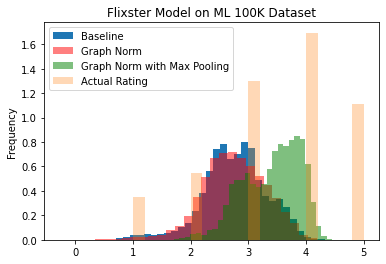

In [99]:
#  c00
plt.title('Flixster Model on ML 100K Dataset')
plt.hist(results_df.pred, bins = 30, density=True)
# c10
plt.hist(results_df2.pred, bins = 30, density=True, alpha = 0.5, color = 'red')
# m10
plt.hist(results_df3.pred, bins = 30, density=True, alpha = 0.5, color = 'green')

plt.hist(results_df.actual, bins = 20, alpha = 0.3, density=True)
plt.legend(['Baseline', 'Graph Norm', 'Graph Norm with Max Pooling', 'Actual Rating'])
# plt.yticks([])
plt.ylabel('Frequency')
plt.savefig('Flixster_Model_on_ML_100k_Ratings_Predictions_Frequency')

In [42]:
comb_df = results_df.merge(results_df2[['u_idx','v_idx','rmse']], on=['u_idx', 'v_idx'], suffixes=('_baseline', '_best')).groupby('actual').agg(
    {'actual':'count', 'rmse_baseline':'mean', 'rmse_best': 'mean'}).rename({'actual': 'count'}, axis=1)

In [ ]:
comb_df['improvement (baseline - best)'] = comb_df['rmse_baseline'] - comb_df['rmse_best']

In [ ]:
! unzip /content/IGMC/results/amazon_music_with_flixster_to_amazon.zip 


Archive:  /content/IGMC/results/amazon_music_with_flixster_to_amazon.zip
   creating: results/amazon_fashion_testmode/
  inflating: results/amazon_fashion_testmode/util_functions.py  
  inflating: results/amazon_fashion_testmode/amazon-base-optimizer_checkpoint10.pth  
  inflating: results/amazon_fashion_testmode/amazon-base-model_checkpoint10.pth  
  inflating: results/amazon_fashion_testmode/Main.py  
  inflating: results/amazon_fashion_testmode/train_eval.py  
  inflating: results/amazon_fashion_testmode/amazon-base-model_checkpoint20.pth  
  inflating: results/amazon_fashion_testmode/cmd_input.txt  
  inflating: results/amazon_fashion_testmode/amazon-base-optimizer_checkpoint30.pth  
  inflating: results/amazon_fashion_testmode/amazon-base-tabular_results.csv  
  inflating: results/amazon_fashion_testmode/1c00-log.csv  
  inflating: results/amazon_fashion_testmode/amazon-base-log.csv  
  inflating: results/amazon_fashion_testmode/amazon-base-model_checkpoint40.pth  
  inflating: re

In [ ]:
nos.getcwd()

'/content/IGMC'